<a href="https://colab.research.google.com/github/Rogerio-mack/work/blob/main/camila_fnirs_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Effect size* **d-Cohen**: Mãe-Estranha

In [1]:
#@markdown imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.set_option('display.float_format', lambda x: '%.4f' % x)
pd.set_option('display.precision', 4)

# Connect to Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# Data Gattering


In [3]:
df = pd.read_excel("/content/drive/MyDrive/Mãe e Estranha - Arquivos .lob/d_Cohen_ME.xlsx",sheet_name='d_Cohen_ME_hbo')
df = df.melt(var_name='Channel', value_name='d_Cohen_ME_hbo', value_vars=df.columns)

for sheet in ['d_Cohen_ME_hbr']:
  temp = pd.read_excel("/content/drive/MyDrive/Mãe e Estranha - Arquivos .lob/d_Cohen_ME.xlsx",sheet_name=sheet)
  temp = temp.melt(var_name='Channel', value_name=sheet, value_vars=temp.columns)
  df = pd.concat([df,temp[[sheet]]],axis=1)

df.columns = ['Channel', 'ME_HBO', 'ME_HBR']
df.head()

,Channel,ME_HBO,ME_HBR
0,S1_D1 1,0.0955,1.8702
1,S1_D3 2,1.6663,-2.7445
2,S1_D4 3,-2.1139,5.4892
3,S1_D6 4,1.2564,1.0989
4,S2_D2 5,1.9341,3.3379


In [4]:
df.describe()

,ME_HBO,ME_HBR
count,28.0000,28.0000
mean,0.6245,-0.2261
std,2.7904,2.6170
min,-8.8289,-5.4444
25%,-0.6188,-2.0543
50%,0.8203,-0.1948
75%,1.9107,1.2167
max,5.5612,5.4892


In [5]:
ME_Actived = []
ME_Intensity = []

for index, row in df.iterrows():
  if row['ME_HBO'] > 0.8 and row['ME_HBR'] < -0.8:
    ME_Actived.append('True')
    if row['ME_HBO'] > df['ME_HBO'].quantile(0.90) and \
    row['ME_HBR'] < df['ME_HBR'].quantile(0.10):
      ME_Intensity.append('(***)')
    elif row['ME_HBO'] > df['ME_HBO'].quantile(0.75) and \
    row['ME_HBR'] < df['ME_HBR'].quantile(0.25):
      ME_Intensity.append('(**)')
    else:
      ME_Intensity.append('(*)')
  else:
    ME_Intensity.append('')
    ME_Actived.append('')

df['Actived'] = ME_Actived
df['Level'] = ME_Intensity

df.style.set_properties(**{'text-align': 'center'})


,Channel,ME_HBO,ME_HBR,Actived,Level
0,S1_D1 1,0.095478,1.870192,,
1,S1_D3 2,1.666317,-2.744510,True,(*)
2,S1_D4 3,-2.113914,5.489177,,
3,S1_D6 4,1.256385,1.098917,,
4,S2_D2 5,1.934126,3.337894,,
5,S2_D4 6,0.633440,-0.432498,,
6,S2_D5 7,-0.915426,1.477202,,
7,S2_D7 8,-0.200977,2.866484,,
8,S3_D5 9,1.007168,1.120135,,
9,S3_D7 10,0.414147,-4.351759,,


In [6]:
df['Ch_nr'] = df.Channel.apply(lambda x: x.split(' ')[1])
df['Channel'] = df.Channel.apply(lambda x: x.split(' ')[0])

df = df[['Channel', 'Ch_nr',
         'ME_HBO', 'ME_HBR', 'Actived', 'Level']]

df

,Channel,Ch_nr,ME_HBO,ME_HBR,Actived,Level
0,S1_D1,1,0.0955,1.8702,,
1,S1_D3,2,1.6663,-2.7445,True,(*)
2,S1_D4,3,-2.1139,5.4892,,
3,S1_D6,4,1.2564,1.0989,,
4,S2_D2,5,1.9341,3.3379,,
5,S2_D4,6,0.6334,-0.4325,,
6,S2_D5,7,-0.9154,1.4772,,
7,S2_D7,8,-0.2010,2.8665,,
8,S3_D5,9,1.0072,1.1201,,
9,S3_D7,10,0.4141,-4.3518,,


In [7]:
from IPython.display import display, Latex, HTML
import warnings

def gera_df_stats_latex(df_stats, titulo):

  warnings.filterwarnings('ignore')
  # latex_table = df_stats.style.to_latex(hrules=True)
  latex_table = df_stats.to_latex(index=None)
  # display(Latex(latex_table))

  latex_table = latex_table.replace('tabular','array')
  latex_table = latex_table.replace('toprule','hline')
  latex_table = latex_table.replace('midrule','hline')
  latex_table = latex_table.replace('bottomrule','hline')

  latex_table = '\\textbf{' + titulo + '} \\\\' + latex_table

  warnings.filterwarnings('default')
  return latex_table

In [8]:
latex_table = gera_df_stats_latex(df,'dCohen-test values')
display(Latex(latex_table))

<IPython.core.display.Latex object>

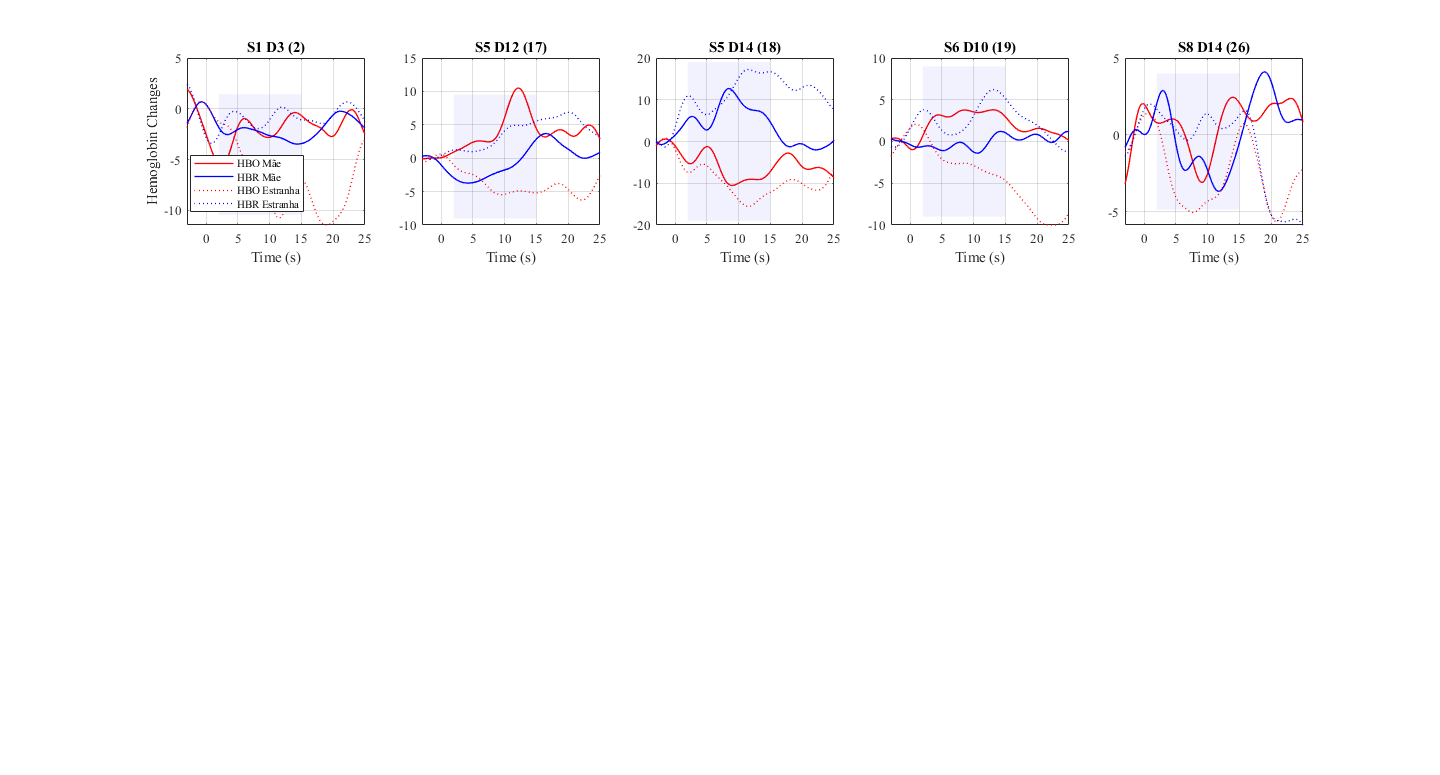

In [6]:
from IPython.display import Image

Image(filename='/content/drive/MyDrive/Mãe e Estranha - Arquivos .lob/d_Cohen_ME.png')

![imagem](x.png)

![imagem]("/content/drive/MyDrive/Mãe e Estranha - Arquivos .lob/d_Cohen_ME.png")

In [ ]:
/content/drive/MyDrive/Mãe e Estranha - Arquivos .lob/d_Cohen_ME.png